TOPIC : AQI Analysis

In [ ]:
# 1. IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# 2. LOAD AND EXPLORE DATA

df = pd.read_csv('city_day.csv')

print("=" * 70)
print("ORIGINAL DATA INFORMATION")
print("=" * 70)
print(f"\nDataset shape: {df.shape} (rows, columns)")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values before cleaning:\n{df.isnull().sum()}\n")

ORIGINAL DATA INFORMATION

Dataset shape: (29531, 16) (rows, columns)

First 5 rows:
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

Column names: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene'

In [ ]:
# 3. DATA CLEANING

print("=" * 70)
print("DATA CLEANING PROCESS")
print("=" * 70)

# Remove duplicate rows
initial_rows = len(df)
df = df.drop_duplicates()
print(f"\n  Removed duplicates: {initial_rows - len(df)} rows deleted")

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(f"  Converted Date to datetime format")

# Remove rows with missing critical columns
df = df.dropna(subset=['Date', 'City', 'AQI'])
print(f"  Removed rows with missing Date, City, or AQI")

# Fill missing numeric values with median
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)
print(f"  Filled missing numeric values with median")

# Remove invalid AQI values
df = df[df['AQI'] >= 0]
print(f"Removed rows with negative AQI values")

# Keep only 2015-2020 data
df = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2020-12-31')]
print(f"Kept only data from 2015-2020")

# Clean city names
df['City'] = df['City'].str.strip()
print(f"  Cleaned city names (removed extra spaces)")

# Convert AQI to numeric
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')
df = df.dropna(subset=['AQI'])

print("\n" + "=" * 70)
print("CLEANED DATA INFORMATION")
print("=" * 70)
print(f"\nDataset shape after cleaning: {df.shape}")
print(f"\nMissing values after cleaning:\n{df.isnull().sum()}")
print(f"\nBasic statistics:\n{df[['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2']].describe()}\n")

DATA CLEANING PROCESS

  Removed duplicates: 0 rows deleted
  Converted Date to datetime format
  Removed rows with missing Date, City, or AQI
  Filled missing numeric values with median
Removed rows with negative AQI values
Kept only data from 2015-2020
  Cleaned city names (removed extra spaces)

CLEANED DATA INFORMATION

Dataset shape after cleaning: (24850, 16)

Missing values after cleaning:
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

Basic statistics:
                AQI         PM2.5          PM10           NO2           SO2
count  24850.000000  24850.000000  24850.000000  24850.000000  24850.000000
mean     166.463581     66.966637    112.102860     28.870163     14.237723
std      140.696585     62.283431     76.325808     24.447523     17.233456
min     

/tmp/ipython-input-1575292143.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


VISUALIZATION 1: Average AQI by City


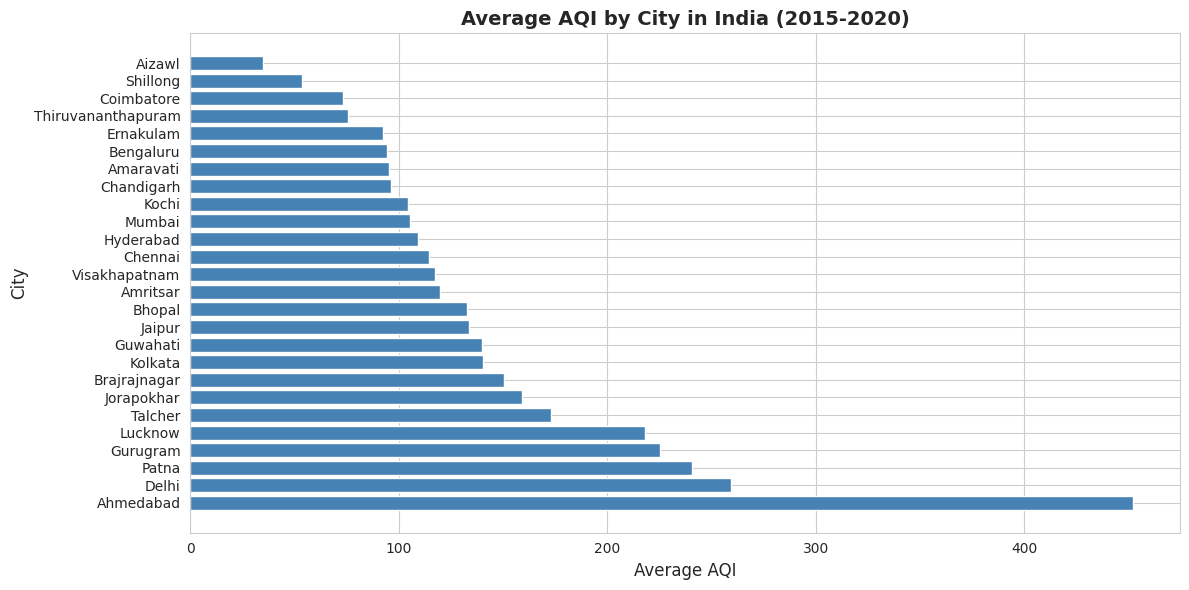

Cities with highest AQI: {'Ahmedabad': 452.12293853073464, 'Delhi': 259.48774387193595, 'Patna': 240.7820424948595}



In [7]:
# ### 4.1 Average AQI by City (Insha)
print("=" * 70)
print("VISUALIZATION 1: Average AQI by City")
print("=" * 70)
plt.figure(figsize=(12, 6))
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
plt.barh(city_aqi.index, city_aqi.values, color='steelblue')
plt.xlabel('Average AQI', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Average AQI by City in India (2015-2020)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
print(f"Cities with highest AQI: {city_aqi.head(3).to_dict()}\n")

VISUALIZATION 3: Distribution of AQI Values


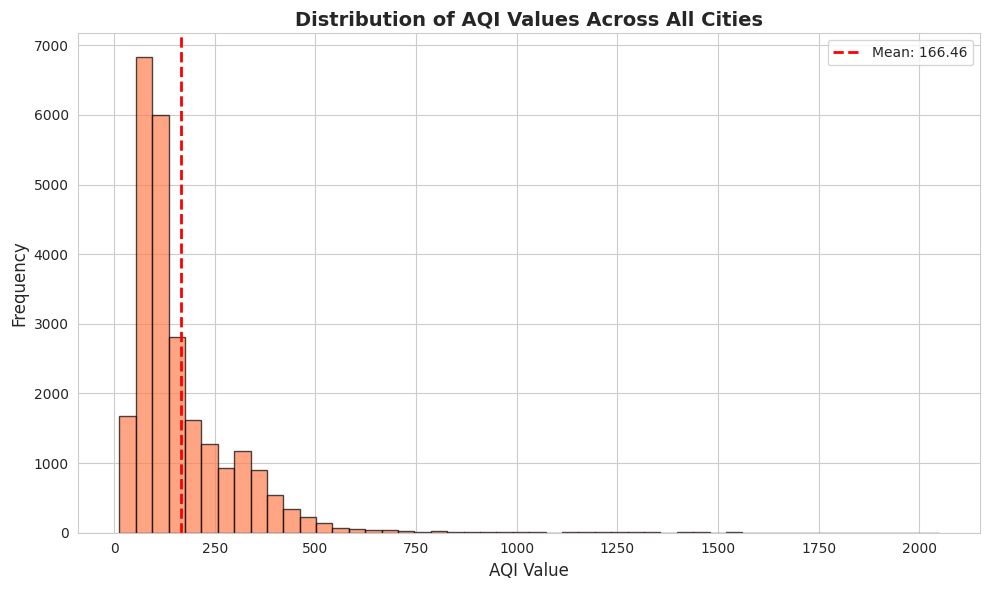

Mean AQI: 166.46
Median AQI: 118.00



In [ ]:
# 4.3 Distribution of AQI Values (Insha)
print("=" * 70)
print("VISUALIZATION 3: Distribution of AQI Values")
print("=" * 70)
plt.figure(figsize=(10, 6))
plt.hist(df['AQI'].dropna(), bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('AQI Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of AQI Values Across All Cities', fontsize=14, fontweight='bold')
plt.axvline(df['AQI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["AQI"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()
print(f"Mean AQI: {df['AQI'].mean():.2f}\nMedian AQI: {df['AQI'].median():.2f}\n")


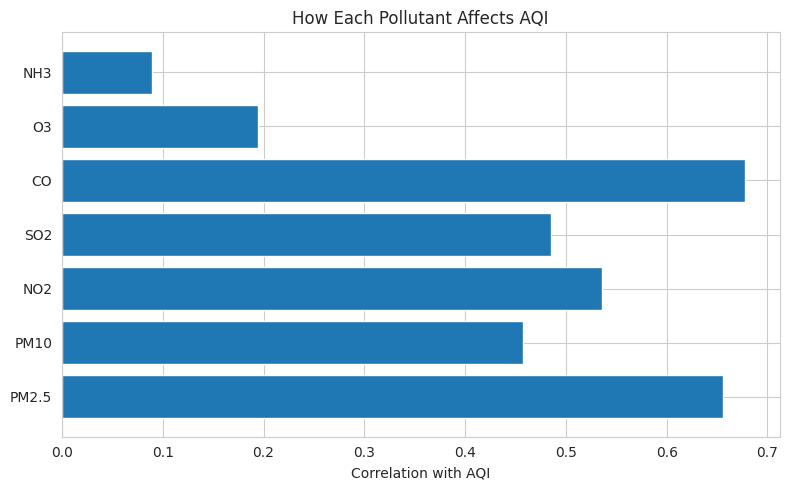

In [ ]:
#Pollutants vs AQI graph (Diya)
aqi_col = "AQI"

# List of possible pollutant columns
pollutants = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", "NH3"]

# Keep only pollutants that exist in the file
pollutants = [p for p in pollutants if p in df.columns]

# Calculate correlation of each pollutant with AQI
correlations = {}
for p in pollutants:
    correlations[p] = df[p].corr(df[aqi_col])

# Convert to pandas series
corr_series = pd.Series(correlations)

# Plot horizontal bar graph
plt.figure(figsize=(8,5))
plt.barh(corr_series.index, corr_series.values)
plt.xlabel("Correlation with AQI")
plt.title("How Each Pollutant Affects AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ## 6. KEY FINDINGS AND CONCLUSIONS for 2015 to 2020 data

print("\n" + "=" * 70)
print("KEY FINDINGS AND CONCLUSIONS")
print("=" * 70)

worst_city = city_aqi.idxmax()
best_city = city_aqi.idxmin()
worst_year = df.groupby('Year')['AQI'].mean().idxmax()
best_year = df.groupby('Year')['AQI'].mean().idxmin()
worst_month = df.groupby('Month_Name')['AQI'].mean().idxmax()

print(f"""
1. WORST AIR QUALITY CITIES:
   - Most polluted city: {worst_city} (Avg AQI: {city_aqi[worst_city]:.2f})
   - Least polluted city: {best_city} (Avg AQI: {city_aqi[best_city]:.2f})

2. TEMPORAL TRENDS:
   - Worst year: {worst_year} with average AQI of {df.groupby('Year')['AQI'].mean()[worst_year]:.2f}
   - Best year: {best_year} with average AQI of {df.groupby('Year')['AQI'].mean()[best_year]:.2f}
   - Overall trend: Air quality {'improved' if df.groupby('Year')['AQI'].mean()[2015] > df.groupby('Year')['AQI'].mean()[2020] else 'declined'} from 2015 to 2020

3. SEASONAL PATTERNS:
   - Most polluted month: {worst_month} (typically winter months)
   - Peak pollution period: Usually November-February (winter season)
   - Reason: Temperature inversion and reduced wind dispersal

4. POLLUTANT ANALYSIS:
   - PM2.5 correlation with AQI: {correlation_data.loc['PM2.5', 'AQI']:.3f} (strongest pollutant)
   - PM10 correlation with AQI: {correlation_data.loc['PM10', 'AQI']:.3f}
   - NO2 correlation with AQI: {correlation_data.loc['NO2', 'AQI']:.3f}

5. RECOMMENDATIONS:
     Focus pollution control efforts on {worst_city}
     Implement stricter regulations during winter months
     Target PM2.5 reduction for maximum AQI improvement
     Monitor seasonal patterns for better resource planning

6. DATA QUALITY:
     Total records analyzed: {len(df):,}
     Cities covered: {df['City'].nunique()}
     Time period: 2015-2020 (6 years)
     Missing data handled: Filled with median values
""")

print("=" * 70)
print("  ANALYSIS COMPLETE!")
print("=" * 70)


KEY FINDINGS AND CONCLUSIONS

1. WORST AIR QUALITY CITIES:
   - Most polluted city: Ahmedabad (Avg AQI: 452.12)
   - Least polluted city: Aizawl (Avg AQI: 34.77)

2. TEMPORAL TRENDS:
   - Worst year: 2015 with average AQI of 212.46
   - Best year: 2020 with average AQI of 113.52
   - Overall trend: Air quality improved from 2015 to 2020

3. SEASONAL PATTERNS:
   - Most polluted month: Nov (typically winter months)
   - Peak pollution period: Usually November-February (winter season)
   - Reason: Temperature inversion and reduced wind dispersal

4. POLLUTANT ANALYSIS:
   - PM2.5 correlation with AQI: 0.656 (strongest pollutant)
   - PM10 correlation with AQI: 0.457
   - NO2 correlation with AQI: 0.536

5. RECOMMENDATIONS:
     Focus pollution control efforts on Ahmedabad
     Implement stricter regulations during winter months
     Target PM2.5 reduction for maximum AQI improvement
     Monitor seasonal patterns for better resource planning

6. DATA QUALITY:
     Total records analyzed

 Libraries imported successfully!

LOADING AND TRANSFORMING DATA FOR ALL CITIES

✓ Loaded Pune
  Shape: (41, 13)
  Columns: ['Day', 'January', 'February', 'March', 'April']...

✓ Loaded Delhi
  Shape: (41, 13)
  Columns: ['Day', 'January', 'February', 'March', 'April']...

✓ Loaded Hyderabad
  Shape: (41, 13)
  Columns: ['Day', 'January', 'February', 'March', 'April']...

✓ Loaded Mumbai
  Shape: (41, 13)
  Columns: ['Day', 'January', 'February', 'March', 'April']...

✓ Loaded Ahmedabad
  Shape: (41, 13)
  Columns: ['Day', 'January', 'February', 'March', 'April']...

✓ Loaded Bengaluru
  Shape: (41, 13)
  Columns: ['Day', 'January', 'February', 'March', 'April']...

COMBINED DATA SUMMARY
Total records: 2427
Cities: ['Pune', 'Delhi', 'Hyderabad', 'Mumbai', 'Ahmedabad', 'Bengaluru']
Date range: 2024-01-01 00:00:00 to 2024-12-31 00:00:00

First few rows:
   City    Month Day    AQI       Date
0  Pune  January   1  142.0 2024-01-01
1  Pune  January   2  141.0 2024-01-02
2  Pune  January   

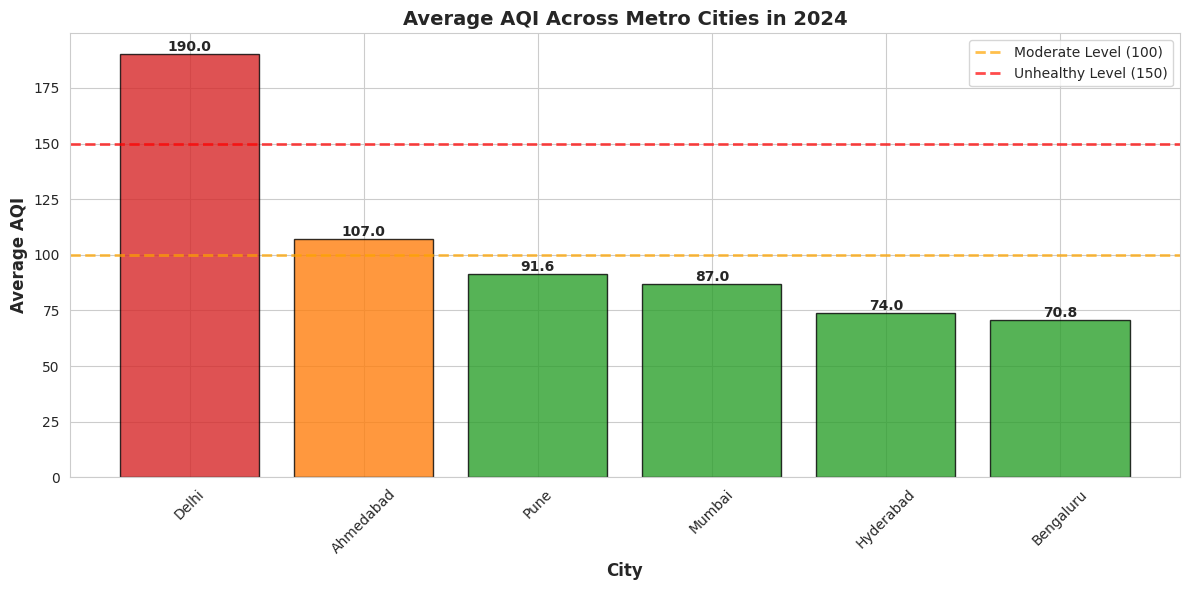

City Rankings (Worst to Best):
City
Delhi        190.043796
Ahmedabad    107.022167
Pune          91.605459
Mumbai        86.967662
Hyderabad     73.992519
Bengaluru     70.844059
Name: AQI, dtype: float64

VISUALIZATION 2: Daily AQI Trends Throughout 2024


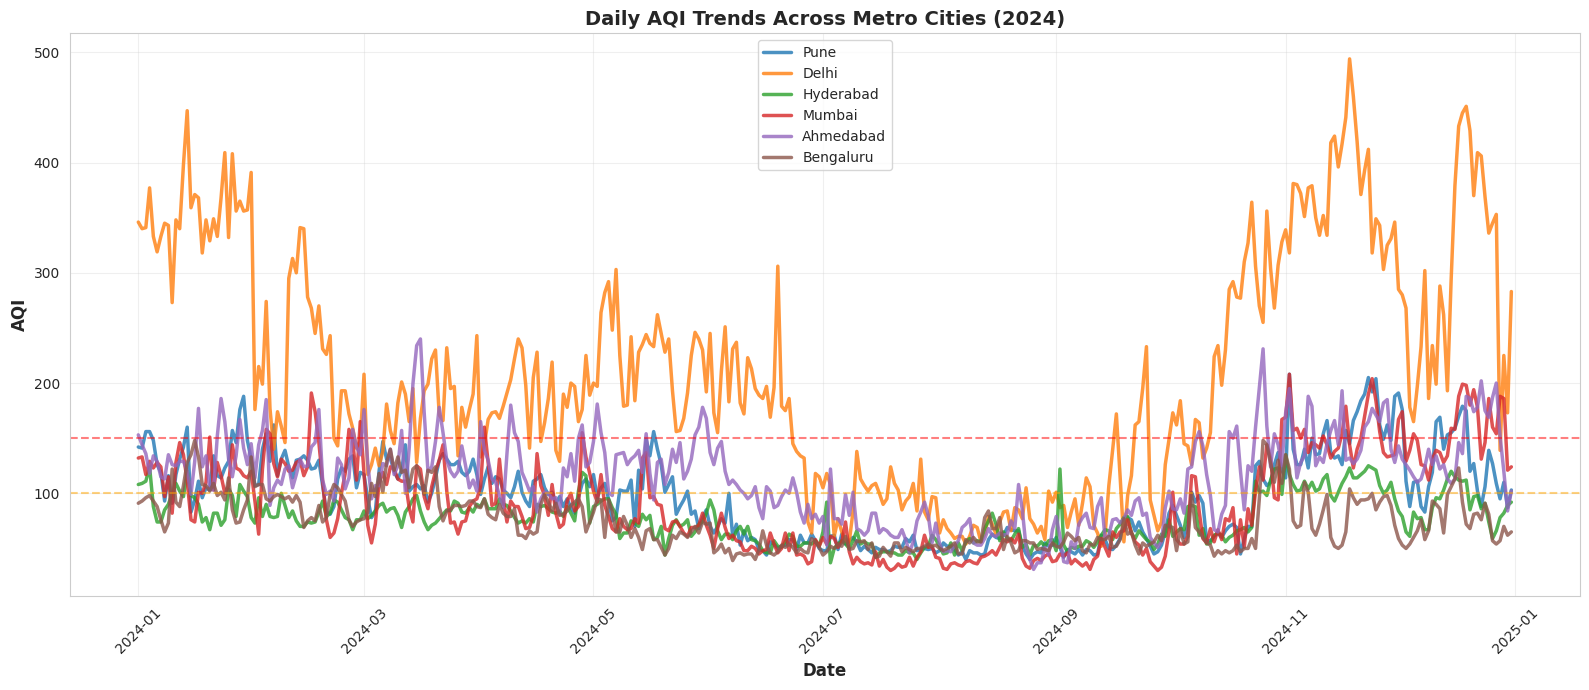

Track how AQI varies throughout the year for each city

VISUALIZATION 3: Monthly Average AQI Comparison


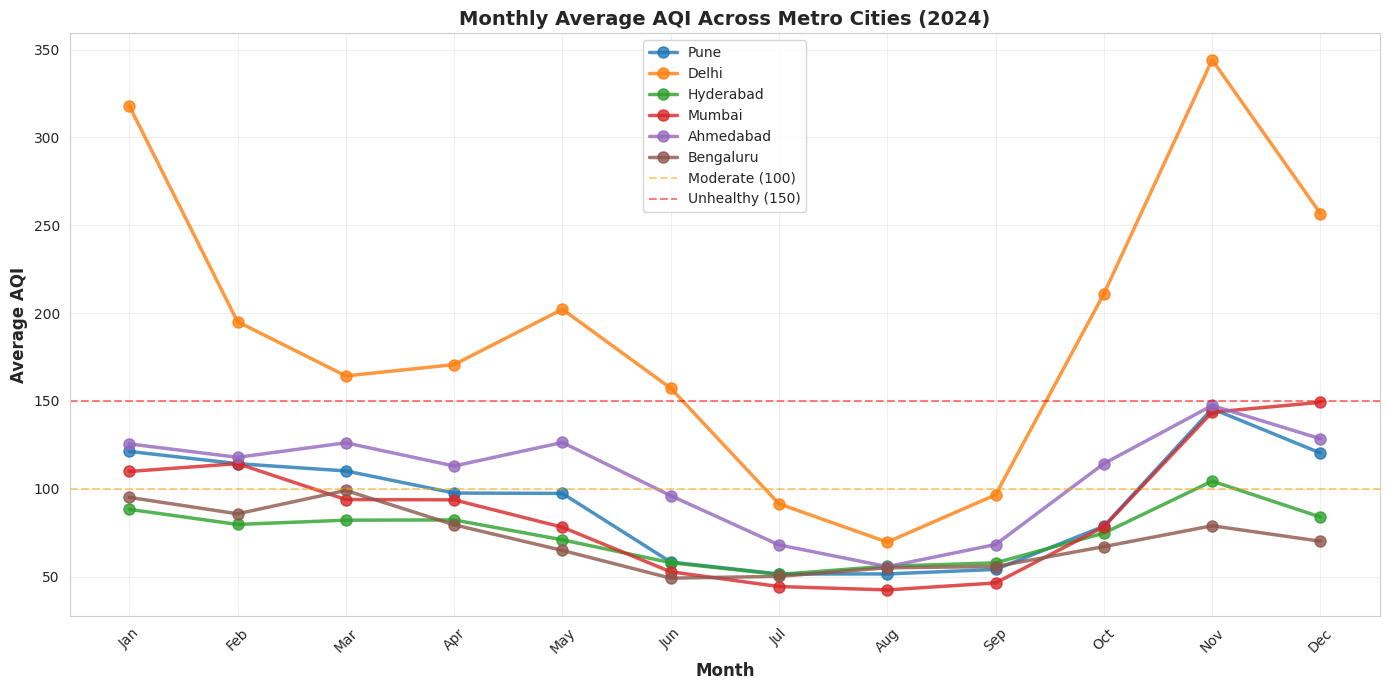

Shows seasonal variation in each city throughout the year

VISUALIZATION 5: Heatmap - City vs Month


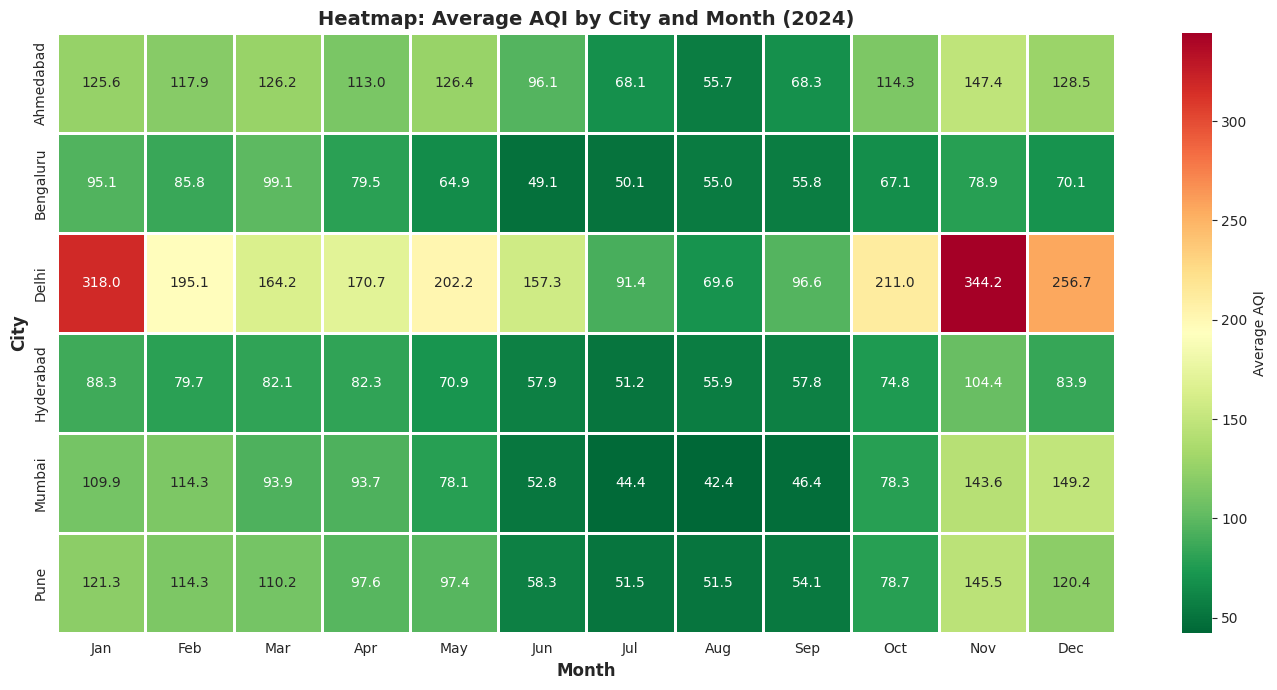

🔴 Red = Higher pollution | 🟢 Green = Lower pollution

VISUALIZATION 6: Number of Unhealthy Air Quality Days


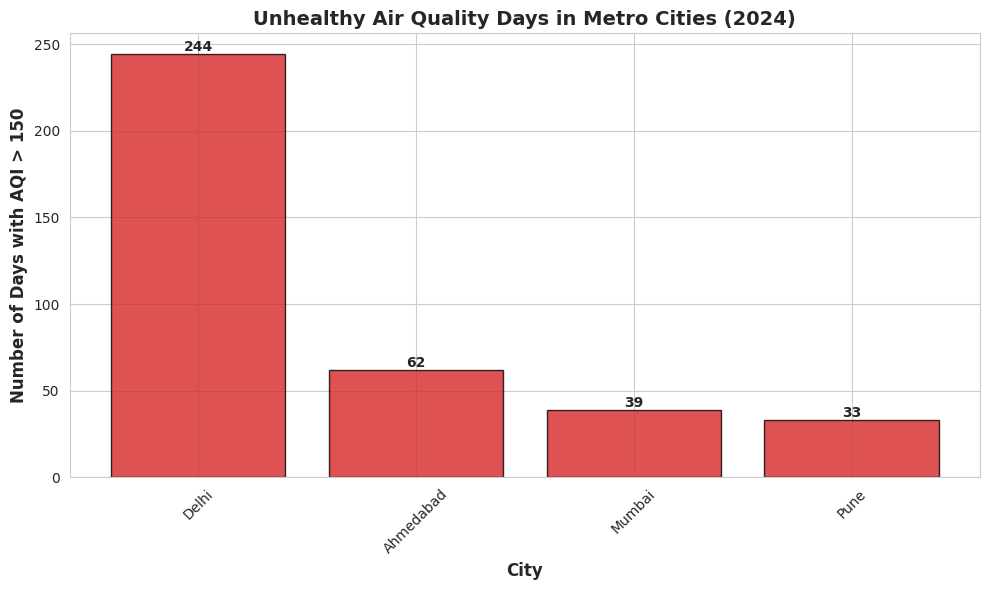

Days with unhealthy air (AQI > 150):
City
Delhi        244
Ahmedabad     62
Mumbai        39
Pune          33
dtype: int64

VISUALIZATION 7: Best vs Worst AQI Days by City


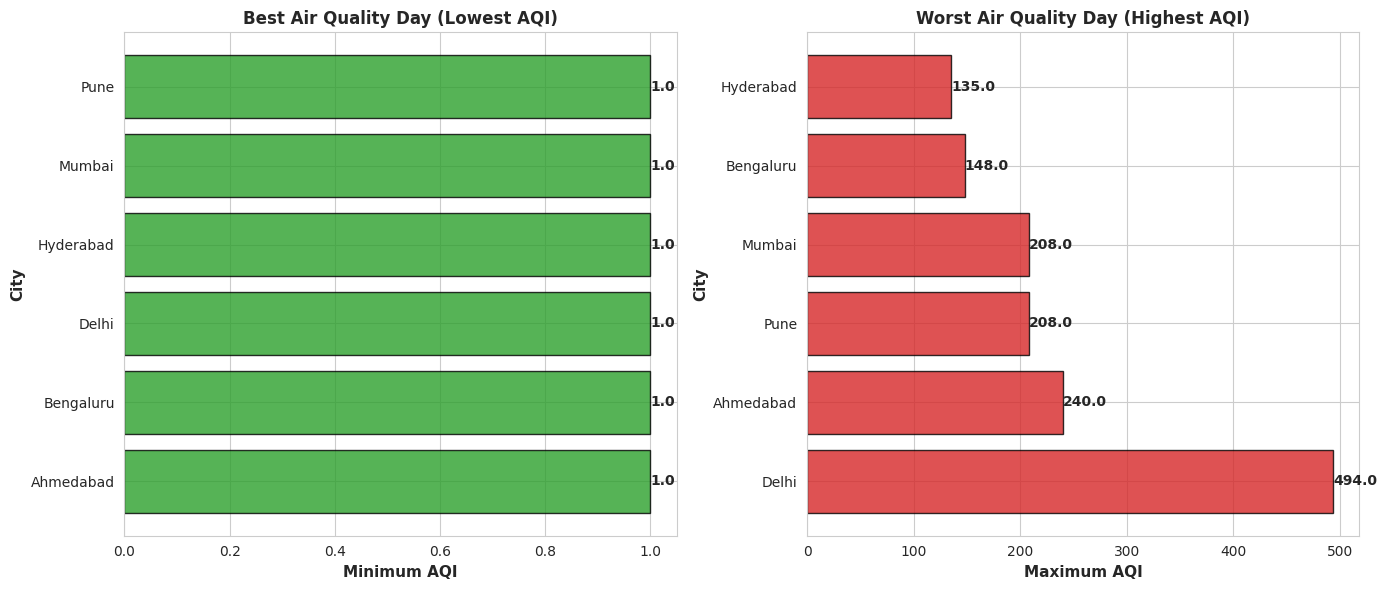

Shows the range of air quality in each city


KEY FINDINGS AND CONCLUSIONS - 2024 METRO CITIES AQI ANALYSIS

1. CITY RANKINGS (2024):
   🔴 Most Polluted: Delhi (Avg AQI: 190.04)
   🟢 Cleanest City: Bengaluru (Avg AQI: 70.84)

   Full Ranking (Worst to Best):

   1. Delhi: 190.04
   2. Ahmedabad: 107.02
   3. Pune: 91.61
   4. Mumbai: 86.97
   5. Hyderabad: 73.99
   6. Bengaluru: 70.84

2. SEASONAL PATTERNS:
   🌨️ Worst Month: Nov (Avg AQI: 160.32)
   🌤️ Best Month: Aug (Avg AQI: 55.05)

   Monthly Trend:

   Jan: 143.87
   Feb: 118.45
   Mar: 112.82
   Apr: 106.25
   May: 107.11
   Jun: 79.36
   Jul: 59.50
   Aug: 55.05
   Sep: 63.29
   Oct: 104.17
   Nov: 160.32
   Dec: 135.56

3. AIR QUALITY CONSISTENCY:
   ✓ Most Stable: Hyderabad (Std Dev: 24.82)
   ✗ Most Variable: Delhi (Std Dev: 113.53)

   Stability Ranking:

   Hyderabad: 24.82
   Bengaluru: 27.81
   Pune: 42.21
   Ahmedabad: 45.09
   Mumbai: 45.62
   Delhi: 113.53

4. UNHEALTHY DAYS (AQI > 150):

   Delhi: 244 days (59.4% of 

In [19]:
#Metro City 2024 Add on
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print(" Libraries imported successfully!\n")

# ## 2. LOAD AND TRANSFORM DATA FOR ALL 6 METRO CITIES

# Update these filenames to match your actual files
cities_files = {
    'Pune': 'AQI_daily_city_level_pune_2024_pune_2024.xlsx',
    'Delhi': 'AQI_daily_city_level_delhi_2024_delhi_2024.xlsx',
    'Hyderabad': 'AQI_daily_city_level_hyderabad_2024_hyderabad_2024.xlsx',
    'Mumbai': 'AQI_daily_city_level_mumbai_2024_mumbai_2024.xlsx',
    'Ahmedabad': 'AQI_daily_city_level_ahmedabad_2024_ahmedabad_2024.xlsx',
    'Bengaluru': 'AQI_daily_city_level_bengaluru_2024_bengaluru_2024.xlsx'
}

# Dictionary to store all city data
all_data = []

print("=" * 70)
print("LOADING AND TRANSFORMING DATA FOR ALL CITIES")
print("=" * 70)

for city_name, filename in cities_files.items():
    try:
        # Read the CSV file
        df = pd.read_excel(filename)

        # Display structure
        print(f"\n✓ Loaded {city_name}")
        print(f"  Shape: {df.shape}")
        print(f"  Columns: {df.columns.tolist()[:5]}...")  # Show first 5 columns

        # Transform from wide format to long format
        # Melt the dataframe to convert month columns to rows
        id_col = [col for col in df.columns if 'day' in col.lower()][0]

        df_melted = df.melt(id_vars=[id_col],
                           var_name='Month',
                           value_name='AQI')

        # Rename day column
        df_melted = df_melted.rename(columns={id_col: 'Day'})

        # Add city name
        df_melted['City'] = city_name

        # Remove missing values
        df_melted = df_melted.dropna(subset=['AQI'])

        # Convert AQI to numeric
        df_melted['AQI'] = pd.to_numeric(df_melted['AQI'], errors='coerce')

        # Clean month names (capitalize first letter)
        df_melted['Month'] = df_melted['Month'].str.strip().str.capitalize()

        all_data.append(df_melted)

    except FileNotFoundError:
        print(f"✗ Could not find {filename}")
    except Exception as e:
        print(f"✗ Error loading {city_name}: {str(e)}")

# Combine all city data
all_cities_df = pd.concat(all_data, ignore_index=True)

# Create a proper date column
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

all_cities_df['Month_Num'] = all_cities_df['Month'].map(month_map)
all_cities_df['Date'] = pd.to_datetime(
    '2024-' + all_cities_df['Month_Num'].astype(str) + '-' + all_cities_df['Day'].astype(str),
    errors='coerce'
)

# Create short month names for visualization
month_short = {
    'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Aug',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'
}
all_cities_df['Month_Short'] = all_cities_df['Month'].map(month_short)

print("\n" + "=" * 70)
print("COMBINED DATA SUMMARY")
print("=" * 70)
print(f"Total records: {len(all_cities_df)}")
print(f"Cities: {all_cities_df['City'].unique().tolist()}")
print(f"Date range: {all_cities_df['Date'].min()} to {all_cities_df['Date'].max()}")
print(f"\nFirst few rows:")
print(all_cities_df[['City', 'Month', 'Day', 'AQI', 'Date']].head(10))
print(f"\nBasic Statistics:")
print(all_cities_df.groupby('City')['AQI'].describe())
print()

# ## 3. VISUALIZATIONS

# ### 3.1 Average AQI Comparison Across Cities (Diya)
print("=" * 70)
print("VISUALIZATION 1: Average AQI Comparison (2024)")
print("=" * 70)

plt.figure(figsize=(12, 6))
city_avg_aqi = all_cities_df.groupby('City')['AQI'].mean().sort_values(ascending=False)
colors = ['#d62728' if x > 150 else '#ff7f0e' if x > 100 else '#2ca02c' for x in city_avg_aqi.values]
bars = plt.bar(city_avg_aqi.index, city_avg_aqi.values, color=colors, edgecolor='black', alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.axhline(y=100, color='orange', linestyle='--', linewidth=2, label='Moderate Level (100)', alpha=0.7)
plt.axhline(y=150, color='red', linestyle='--', linewidth=2, label='Unhealthy Level (150)', alpha=0.7)
plt.xlabel('City', fontsize=12, fontweight='bold')
plt.ylabel('Average AQI', fontsize=12, fontweight='bold')
plt.title('Average AQI Across Metro Cities in 2024', fontsize=14, fontweight='bold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"City Rankings (Worst to Best):\n{city_avg_aqi}\n")

# ### 3.2 AQI Trends Over Time - All Cities (Shamik)
print("=" * 70)
print("VISUALIZATION 2: Daily AQI Trends Throughout 2024")
print("=" * 70)

plt.figure(figsize=(16, 7))
for city in cities_files.keys():
    city_df = all_cities_df[all_cities_df['City'] == city].sort_values('Date')
    plt.plot(city_df['Date'], city_df['AQI'], label=city, linewidth=2.5, alpha=0.8)

plt.axhline(y=100, color='orange', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=150, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('AQI', fontsize=12, fontweight='bold')
plt.title('Daily AQI Trends Across Metro Cities (2024)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Track how AQI varies throughout the year for each city\n")

# ### 3.3 Monthly Average AQI - All Cities (Shamik)
print("=" * 70)
print("VISUALIZATION 3: Monthly Average AQI Comparison")
print("=" * 70)

plt.figure(figsize=(14, 7))

# Create proper month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data = all_cities_df.groupby(['Month_Short', 'City'])['AQI'].mean().reset_index()
monthly_data['Month_Short'] = pd.Categorical(monthly_data['Month_Short'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values('Month_Short')

for city in cities_files.keys():
    city_monthly = monthly_data[monthly_data['City'] == city]
    plt.plot(city_monthly['Month_Short'], city_monthly['AQI'], marker='o',
             linewidth=2.5, markersize=8, label=city, alpha=0.8)

plt.axhline(y=100, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='Moderate (100)')
plt.axhline(y=150, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='Unhealthy (150)')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Average AQI', fontsize=12, fontweight='bold')
plt.title('Monthly Average AQI Across Metro Cities (2024)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Shows seasonal variation in each city throughout the year\n")

# ### 3.5 Heatmap - City vs Month (Labdhi)
print("=" * 70)
print("VISUALIZATION 5: Heatmap - City vs Month")
print("=" * 70)

heatmap_data = all_cities_df.pivot_table(values='AQI', index='City',
                                          columns='Month_Short', aggfunc='mean')
# Reorder columns by month
heatmap_data = heatmap_data[month_order]

plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn_r',
            cbar_kws={'label': 'Average AQI'}, linewidths=1, linecolor='white')
plt.title('Heatmap: Average AQI by City and Month (2024)', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('City', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("🔴 Red = Higher pollution | 🟢 Green = Lower pollution\n")

# ### 3.6 Days with Unhealthy AQI (Labdhi)
print("=" * 70)
print("VISUALIZATION 6: Number of Unhealthy Air Quality Days")
print("=" * 70)

unhealthy_days = all_cities_df[all_cities_df['AQI'] > 150].groupby('City').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(unhealthy_days.index, unhealthy_days.values, color='#d62728', edgecolor='black', alpha=0.8)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('City', fontsize=12, fontweight='bold')
plt.ylabel('Number of Days with AQI > 150', fontsize=12, fontweight='bold')
plt.title('Unhealthy Air Quality Days in Metro Cities (2024)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Days with unhealthy air (AQI > 150):\n{unhealthy_days}\n")

# ### 3.7 Best vs Worst Days (Labdhi)
print("=" * 70)
print("VISUALIZATION 7: Best vs Worst AQI Days by City")
print("=" * 70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Best days
best_aqi = all_cities_df.groupby('City')['AQI'].min().sort_values()
bars1 = ax1.barh(best_aqi.index, best_aqi.values, color='#2ca02c', edgecolor='black', alpha=0.8)
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2., f'{width:.1f}',
            ha='left', va='center', fontweight='bold', fontsize=10)
ax1.set_xlabel('Minimum AQI', fontsize=11, fontweight='bold')
ax1.set_ylabel('City', fontsize=11, fontweight='bold')
ax1.set_title('Best Air Quality Day (Lowest AQI)', fontsize=12, fontweight='bold')

# Worst days
worst_aqi = all_cities_df.groupby('City')['AQI'].max().sort_values(ascending=False)
bars2 = ax2.barh(worst_aqi.index, worst_aqi.values, color='#d62728', edgecolor='black', alpha=0.8)
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2., f'{width:.1f}',
            ha='left', va='center', fontweight='bold', fontsize=10)
ax2.set_xlabel('Maximum AQI', fontsize=11, fontweight='bold')
ax2.set_ylabel('City', fontsize=11, fontweight='bold')
ax2.set_title('Worst Air Quality Day (Highest AQI)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Shows the range of air quality in each city\n")

# ## 4. KEY FINDINGS AND CONCLUSIONS

print("\n" + "=" * 70)
print("KEY FINDINGS AND CONCLUSIONS - 2024 METRO CITIES AQI ANALYSIS")
print("=" * 70)

# Calculate statistics
worst_city = city_avg_aqi.idxmax()
best_city = city_avg_aqi.idxmin()

# Monthly statistics
monthly_avg = all_cities_df.groupby('Month_Short')['AQI'].mean()
monthly_avg = monthly_avg[month_order]  # Order by month
worst_month = monthly_avg.idxmax()
best_month = monthly_avg.idxmin()

# Consistency analysis
city_std = all_cities_df.groupby('City')['AQI'].std().sort_values()
most_stable = city_std.idxmin()
most_variable = city_std.idxmax()

# AQI category counts
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

all_cities_df['AQI_Category'] = all_cities_df['AQI'].apply(categorize_aqi)
category_counts = all_cities_df.groupby(['City', 'AQI_Category']).size().unstack(fill_value=0)

print(f"""
1. CITY RANKINGS (2024):
   🔴 Most Polluted: {worst_city} (Avg AQI: {city_avg_aqi[worst_city]:.2f})
   🟢 Cleanest City: {best_city} (Avg AQI: {city_avg_aqi[best_city]:.2f})

   Full Ranking (Worst to Best):
""")
for i, (city, aqi) in enumerate(city_avg_aqi.items(), 1):
    print(f"   {i}. {city}: {aqi:.2f}")

print(f"""
2. SEASONAL PATTERNS:
   🌨️ Worst Month: {worst_month} (Avg AQI: {monthly_avg[worst_month]:.2f})
   🌤️ Best Month: {best_month} (Avg AQI: {monthly_avg[best_month]:.2f})

   Monthly Trend:
""")
for month, aqi in monthly_avg.items():
    print(f"   {month}: {aqi:.2f}")

print(f"""
3. AIR QUALITY CONSISTENCY:
   ✓ Most Stable: {most_stable} (Std Dev: {city_std[most_stable]:.2f})
   ✗ Most Variable: {most_variable} (Std Dev: {city_std[most_variable]:.2f})

   Stability Ranking:
""")
for city, std in city_std.items():
    print(f"   {city}: {std:.2f}")

print(f"""
4. UNHEALTHY DAYS (AQI > 150):
""")
if len(unhealthy_days) > 0:
    for city, days in unhealthy_days.items():
        percentage = (days / len(all_cities_df[all_cities_df['City'] == city])) * 100
        print(f"   {city}: {days} days ({percentage:.1f}% of the year)")
else:
    print("   No cities had unhealthy air quality days!")

print(f"""
5. EXTREME VALUES:
   Worst Day Overall: {worst_aqi.max():.1f} AQI in {worst_aqi.idxmax()}
   Best Day Overall: {best_aqi.min():.1f} AQI in {best_aqi.idxmin()}

6. AIR QUALITY DISTRIBUTION BY CATEGORY:
""")
print(category_counts)

print(f"""
7. KEY OBSERVATIONS:
   ✓ All cities show seasonal variation in AQI levels
   ✓ Winter months ({worst_month}) consistently worse across metros
   ✓ {worst_city} needs urgent pollution control measures
   ✓ {best_city} can serve as a model for other cities
   ✓ Air quality varies significantly within each city (check std dev)
   ✓ Most cities experience moderate to poor air quality regularly

8. HEALTH IMPLICATIONS:
   - AQI 0-50 (Good): Minimal health impact
   - AQI 51-100 (Satisfactory): Minor breathing discomfort for sensitive people
   - AQI 101-200 (Moderate): Breathing discomfort for sensitive groups
   - AQI 201-300 (Poor): Breathing discomfort for most people
   - AQI 301-400 (Very Poor): Respiratory illness on prolonged exposure
   - AQI 400+ (Severe): Health alert - affects even healthy people

9. CITY-SPECIFIC INSIGHTS:
""")

for city in cities_files.keys():
    city_data = all_cities_df[all_cities_df['City'] == city]
    avg_aqi = city_data['AQI'].mean()
    max_aqi = city_data['AQI'].max()
    min_aqi = city_data['AQI'].min()
    good_days = len(city_data[city_data['AQI'] <= 100])
    total_days = len(city_data)

    good_percentage = 0.0 # Default to 0.0 for cities with no data
    if total_days > 0:
        good_percentage = (good_days / total_days) * 100

    print(f"""
   {city}:
   - Average AQI: {avg_aqi:.2f}
   - Range: {min_aqi:.1f} to {max_aqi:.1f}
   - Good/Satisfactory days: {good_days}/{total_days} ({good_percentage:.1f}%)
   - Status: {'✓ Generally good air' if avg_aqi < 100 else '⚠ Needs attention' if avg_aqi < 150 else '🔴 Critical - urgent action needed'}
""")

print(f"""
10. RECOMMENDATIONS:
   ✓ Implement stricter emission controls in {worst_city}
   ✓ Focus pollution control during {worst_month}
   ✓ Issue public health advisories on high AQI days
   ✓ Promote public transport and electric vehicles in all cities
   ✓ Monitor and regulate industrial emissions more closely
   ✓ Increase urban green cover and tree plantation
   ✓ Implement odd-even vehicle schemes during peak pollution
   ✓ Create awareness campaigns about air pollution health risks
   ✓ Install air purifiers in schools and public buildings in worst-affected cities
   ✓ Encourage work-from-home during severe pollution episodes
""")

print("=" * 70)
print("✓ ANALYSIS COMPLETE!")
print("=" * 70)